In [601]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
import time
import datetime
sns.set()
# magic word for producing visualizations in notebook
%matplotlib inline

fileToRead_1=('C:/Dokumente/10_Innovation_Hub/30_Kurs/Blog/data/survey_results_public.csv')
df=pd.read_csv(fileToRead_1)
df=results_public

fileToRead_2=('C:/Dokumente/10_Innovation_Hub/30_Kurs/Blog/data/survey_results_schema.csv')
results_schema=pd.read_csv(fileToRead_2)

In [602]:
results_public.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,JobSat_val,Hobbyist_val,comp_range
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,4,1,<50k
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,4,0,<100k
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,4,1,<100k
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,NaN,NaN,NaN,NaN,Yes,Too long,Difficult,2,1,<50k
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,5,1,<100k


In [603]:
results_public.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [604]:
results_public.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,JobSat_val,Hobbyist_val
count,51640.000000,5.164000e+04,51640.000000,51169.000000,38066.000000,49534.000000,51640.000000,51640.000000
mean,44462.434527,1.011704e+06,61718.992796,41.831304,4.874063,31.287384,3.686580,0.792080
std,25670.433953,2.107872e+07,47981.376499,35.870802,4.975090,8.061817,1.254673,0.405823
min,3.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,22177.750000,1.500000e+04,23376.000000,40.000000,2.000000,26.000000,3.000000,1.000000
50%,44533.500000,6.000000e+04,52248.000000,40.000000,4.000000,30.000000,4.000000,1.000000
75%,66708.250000,1.200000e+05,87036.000000,43.000000,5.000000,35.000000,5.000000,1.000000
max,88883.000000,3.000000e+09,248652.000000,4850.000000,99.000000,99.000000,5.000000,1.000000


In [605]:
results_public.shape

(51640, 88)

C:\Users\q477847\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


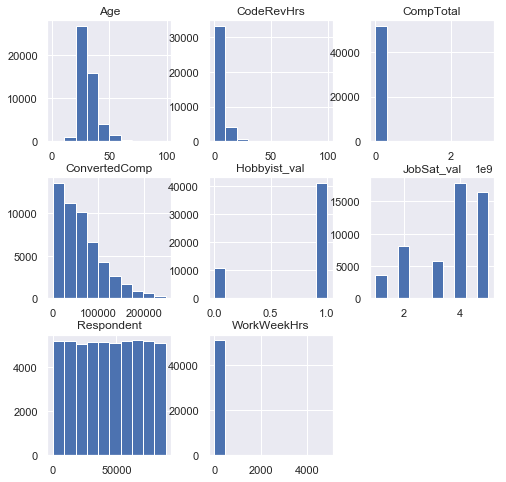

In [606]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
results_public.hist(ax = ax);

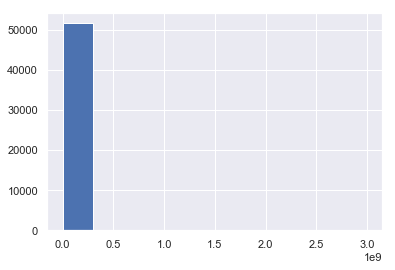

In [607]:
results_public['CompTotal'].hist()

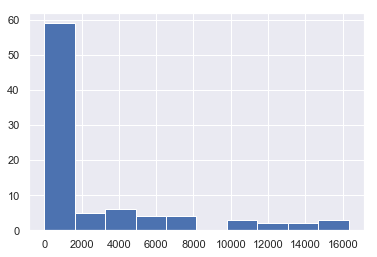

In [608]:
results_public.isna().sum().hist()

In [609]:
results_public['JobSat'].isnull().mean()

0.0

In [610]:
# I drop all rows for missing job satisfaction. Imputing values does not make sense for me here.
results_public = results_public.dropna(subset=['JobSat'], how='any')

In [611]:
results_public['JobSat'].isnull().mean()

0.0

In [612]:
JobSat_categories=results_public['JobSat'].unique().tolist()
JobSat_categories

['Slightly satisfied',
 'Slightly dissatisfied',
 'Very satisfied',
 'Neither satisfied nor dissatisfied',
 'Very dissatisfied']

In [613]:
results_public['JobSat_val']=results_public['JobSat']
results_public['JobSat_val'].replace(['Slightly satisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Very satisfied', 'Very dissatisfied'], [4, 2, 3, 5, 1], inplace=True)
results_public[['JobSat', 'JobSat_val']].head(15)

,JobSat,JobSat_val
2,Slightly satisfied,4
3,Slightly satisfied,4
8,Slightly satisfied,4
9,Slightly dissatisfied,2
12,Very satisfied,5
13,Very satisfied,5
16,Neither satisfied nor dissatisfied,3
17,Very satisfied,5
18,Very satisfied,5
19,Slightly dissatisfied,2


In [614]:
results_public['Hobbyist_val']=results_public['Hobbyist']
results_public['Hobbyist_val'].replace(['Yes', 'No'], [1, 0], inplace=True)
results_public[['Hobbyist', 'Hobbyist_val']].head(15)

,Hobbyist,Hobbyist_val
2,Yes,1
3,No,0
8,Yes,1
9,Yes,1
12,Yes,1
13,Yes,1
16,Yes,1
17,Yes,1
18,Yes,1
19,No,0


In [615]:
results_public['Hobbyist_val'].isnull().mean()

0.0

In [616]:
results_public['Hobbyist_val'].mean()

0.7920797831138652

In [617]:
res=results_public.groupby(['JobSat_val']).mean()['Hobbyist_val']
res

JobSat_val
1    0.775401
2    0.784106
3    0.782959
4    0.788992
5    0.806211
Name: Hobbyist_val, dtype: float64

In [618]:
# Splitting the dataset into Hobbyists and no Hobbyists
results_public_hobbyist=results_public[results_public['Hobbyist_val']==1]
results_public_no_hobbyist=results_public[results_public['Hobbyist_val']==0]
results_public_no_hobbyist.shape

(10737, 88)

In [619]:
res_hob=results_public_hobbyist['JobSat_val'].value_counts()
res_no_hob=results_public_no_hobbyist['JobSat_val'].value_counts()
res_hob

4    14063
5    13213
2     6305
3     4567
1     2755
Name: JobSat_val, dtype: int64

In [620]:
res_no_hob_pro.sort_index()

1    0.074322
2    0.161684
3    0.117910
4    0.350284
5    0.295800
Name: JobSat_val, dtype: float64

In [621]:
results_public_no_hobbyist.shape

(10737, 88)

In [622]:
res_hob_pro = res_hob/results_public_hobbyist.shape[0]
res_hob_pro = res_hob_pro.sort_index()
res_hob_pro

1    0.067354
2    0.154145
3    0.111654
4    0.343813
5    0.323033
Name: JobSat_val, dtype: float64

In [623]:
res_no_hob_pro = res_no_hob/results_public_no_hobbyist.shape[0]
res_no_hob_pro = res_no_hob_pro.sort_index()
res_no_hob_pro

1    0.074322
2    0.161684
3    0.117910
4    0.350284
5    0.295800
Name: JobSat_val, dtype: float64

In [624]:
res_hob_pro.values.sum()

1.0

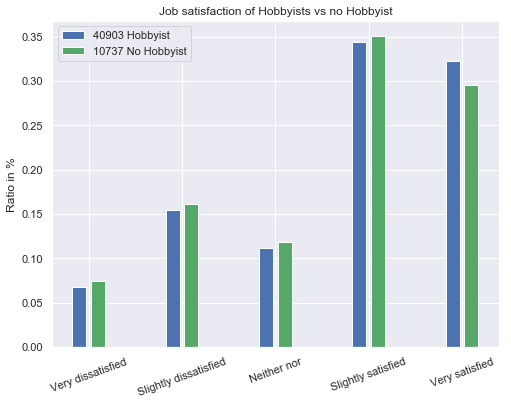

In [671]:
# plot the answer to my fist question
Legende_Hobby = [str(int(results_public_hobbyist.shape[0]))+' Hobbyist',str(int(results_public_no_hobbyist.shape[0]))+' No Hobbyist']
y1 = res_hob_pro.values
y2 = res_no_hob_pro.values
Sat_Labels = ['Very dissatisfied','Slightly dissatisfied','Neither nor','Slightly satisfied','Very satisfied']

ind = np.arange(5)  # the x locations for the groups
width = 0.1 

fig = plt.figure(figsize=(8, 6)) 

ax = plt.subplot()
ax.bar(ind-width, y1, width=0.15, color='b', align='center')
ax.bar(ind+width, y2, width=0.15, color='g', align='center')
ax.set_ylabel("Ratio in %")
ax.set_title('Job satisfaction of Hobbyists vs no Hobbyist')
plt.xticks(ind, Sat_Labels, rotation=20)
plt.legend(Legende_Hobby,loc=0)
plt.savefig("Job satisfaction of Hobbyists vs no Hobbyist.png")

In [626]:
# using the "fresh" dataset. All rows are included. No rows deleted yet.
salary_df=df

In [627]:
salary_df[['CompTotal', 'CompFreq', 'ConvertedComp']].head()

,CompTotal,CompFreq,ConvertedComp
2,23000.0,Monthly,8820.0
3,61000.0,Yearly,61000.0
8,138000.0,Yearly,95179.0
9,950000.0,Yearly,13293.0
12,90000.0,Yearly,90000.0


In [628]:
salary_df['Country'].head()

2          Thailand
3     United States
8       New Zealand
9             India
12    United States
Name: Country, dtype: object

In [629]:
# I am currently not sure about the conversion of the salaries. To minimize the error I only use the US 
# salaries for my future analysis
results_public_US=df[df['Country'] == 'United States']

In [630]:
results_public_US=results_public_US.sort_values(['CompTotal'], ascending=[False])
results_public_US[['CompTotal', 'CompFreq', 'ConvertedComp']].head(10)

,CompTotal,CompFreq,ConvertedComp
40474,50000000.0,Monthly,25860.0
6387,12000000.0,Monthly,3420.0
84354,720000.0,Yearly,10075.0
36591,248400.0,Yearly,248400.0
43826,248000.0,Yearly,248000.0
63049,247084.0,Yearly,247084.0
8129,246000.0,Yearly,246000.0
37845,245000.0,Yearly,245000.0
35992,245000.0,Yearly,245000.0
14159,245000.0,Yearly,245000.0


In [631]:
results_public_US['ConvertedComp'].max()

248400.0

In [655]:
results_public_US['CompTotal'].max()
#yeah, no...

50000000.0

C:\Users\q477847\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


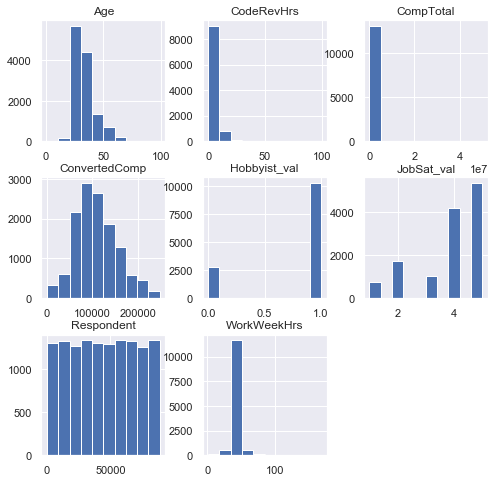

In [632]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
results_public_US.hist(ax = ax);

In [633]:
results_public_US.shape

(13064, 88)

In [634]:
results_public_US['ConvertedComp'].isnull().mean()

0.0

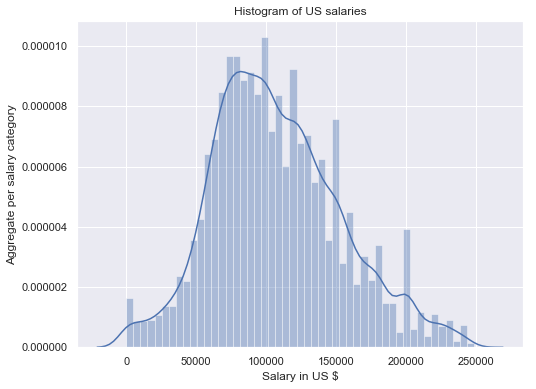

In [659]:
fig = plt.figure(figsize=(8, 6)) 
sns.distplot(results_public_US['ConvertedComp'])
plt.title('Histogram of US salaries')
plt.ylabel('Aggregate per salary category')
plt.xlabel('Salary in US $')
plt.savefig("Histogram of US salaries.png")

In [636]:
results_public_US['ConvertedComp'].head()

40474     25860.0
6387       3420.0
84354     10075.0
36591    248400.0
43826    248000.0
Name: ConvertedComp, dtype: float64

In [637]:
# create 50k& ranges
def f(row):
    if row['ConvertedComp'] <= 50000:
        val = '0-50k'
    elif row['ConvertedComp'] <= 100000:
        val = '50-100k'
    elif row['ConvertedComp'] <= 150000:
        val = '100-150k'
    elif row['ConvertedComp'] <= 200000:
        val = '150-200k'
    else:
        val = '200-250k'
    return val

In [638]:
results_public_US['comp_range'] = results_public_US.apply(f, axis=1)

In [639]:
results_public_US[['comp_range', 'ConvertedComp']].head()

,comp_range,ConvertedComp
40474,0-50k,25860.0
6387,0-50k,3420.0
84354,0-50k,10075.0
36591,200-250k,248400.0
43826,200-250k,248000.0


In [640]:
results_public_US_hobbyist=results_public_US[results_public_US['Hobbyist_val']==1]
results_public_US_no_hobbyist=results_public_US[results_public_US['Hobbyist_val']==0]
results_public_US_hobbyist.shape

(10293, 88)

In [641]:
sal_hob=results_public_US_hobbyist['comp_range'].value_counts()
sal_no_hob=results_public_US_no_hobbyist['comp_range'].value_counts()
sal_no_hob

50-100k     1198
100-150k     961
150-200k     346
0-50k        188
200-250k      78
Name: comp_range, dtype: int64

In [642]:
sal_no_hob = sal_no_hob.reindex(index = ['0-50k','50-100k','100-150k','150-200k','200-250k'])
sal_hob = sal_hob.reindex(index = ['0-50k','50-100k','100-150k','150-200k','200-250k'])

sal_no_hob

0-50k        188
50-100k     1198
100-150k     961
150-200k     346
200-250k      78
Name: comp_range, dtype: int64

In [643]:
sal_hob.sort_index()
sal_hob

0-50k        886
50-100k     4196
100-150k    3530
150-200k    1358
200-250k     323
Name: comp_range, dtype: int64

In [644]:
sal_hob_prob = sal_hob/results_public_US_hobbyist.shape[0]
sal_no_hob_prob = sal_no_hob/results_public_US_no_hobbyist.shape[0]
len(sal_no_hob_prob)

5

In [645]:
len(sal_hob_prob)

5

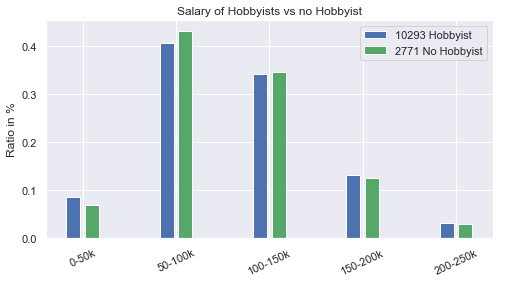

In [663]:
Legende_Hobby = [str(int(results_public_US_hobbyist.shape[0]))+' Hobbyist',str(int(results_public_US_no_hobbyist.shape[0]))+' No Hobbyist']
y1 = sal_hob_prob.values
y2 = sal_no_hob_prob.values
Sat_Labels = sal_no_hob_prob.index

ind = np.arange(int(len(sal_hob_prob)))  # the x locations for the groups
width = 0.1 

fig = plt.figure(figsize=(8, 4)) 

ax = plt.subplot()
ax.bar(ind-width, y1, width=0.15, color='b', align='center')
ax.bar(ind+width, y2, width=0.15, color='g', align='center')
ax.set_ylabel("Ratio in %")
ax.set_title('Salary of Hobbyists vs no Hobbyist')
plt.xticks(ind, Sat_Labels, rotation=25)
plt.legend(Legende_Hobby,loc=0)
plt.savefig("Salary of Hobbyists vs no Hobbyist.png")

In [647]:
# analysis salary over Age hobbyist vs no hobbyist

In [648]:
new_df=results_public_US

In [649]:
new_df['Age'].unique()

array([31. , 29. , 27. , 40. , 62. , 35. , 53. , 54. , 28. , 26. , 37. ,
       38. , 51. ,  nan, 30. , 42. , 32. , 33. , 39. , 44. , 36. , 50. ,
       43. , 48. , 46. , 41. , 45. , 58. , 59. , 52. , 23. , 22. , 56. ,
       49. , 24. , 34. , 25. , 55. , 61. , 21. , 57. , 20. , 65. , 47. ,
       63. , 60. , 71. , 64. , 66. , 67. , 18. , 69. , 19. , 72. , 37.5,
       68. , 16. , 99. , 74. , 70. , 15. ,  2. , 24.5, 26.5, 61.3, 17. ,
       31.5,  1. ])

In [650]:
# create age ranges
def f(row):
    if row['Age'] <= 25:
        val = '0-25y'
    elif row['Age'] <= 35:
        val = '25-35y'
    elif row['Age'] <= 45:
        val = '35-45y'
    elif row['Age'] <= 55:
        val = '45-55y'
    elif row['Age'] <= 65:
        val = '55-65y'
    else:
        val = 'over 65y'
    return val

In [651]:
results_public_US['Age-group'] = results_public_US.apply(f, axis=1)

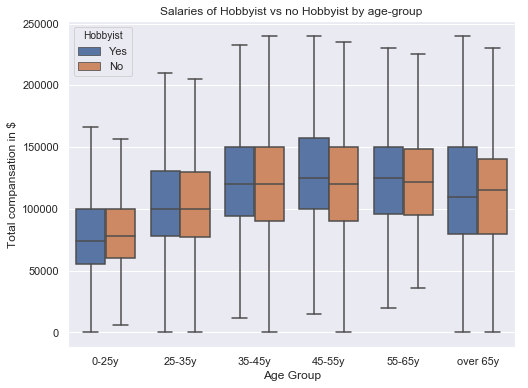

In [652]:
fig = plt.figure(figsize=(8, 6)) 
#ax = plt.subplots()
sns_plot = sns.boxplot(x=new_df["Age-group"], y=new_df["ConvertedComp"], hue="Hobbyist", data=new_df, showfliers = False, order=['0-25y','25-35y','35-45y','45-55y','55-65y','over 65y'])
#sns_plot.set(ylim=(50, 70))
sns_plot.set_title('Salaries of Hobbyist vs no Hobbyist by age-group')
plt.ylabel('Total compansation in $')
plt.xlabel('Age Group')
#plt.savefig(""+date+"_M_Kapa_kmRange_2014_2015.png")
#plt.show()
plt.savefig("Salaries of Hobbyist vs no Hobbyist by age-group.png")

In [653]:
# looking at this plot, everything over 250k$ seems to be an aoutlier. So I change the older plot accordingly